DNN - Dense layers
CNN - Convolutional neural network

# 1-1 - 
## rank of input x from 0 to 2pi. 
Do not need to set the # of parameters equal, just close.

First figure is training loss
2nd figure is prediction of each model

Import MNIST or CIFAR-10 from Torch vision. Use either CNN or DNN. Show loss and accuracy. Comment on results & show observservations

# 1-2
- Collect parameters of the models - Grab from every layer - Collect and put into 1 dimensional feaure than reduce to a feature with only 2 numbers
- Look up PCA
- FIgiure out how to compute second order optimization method ex: Newton's method or Levenberg-Marquardt algorithm

# Homework 1-1

## 1-1 Training on a function

In [51]:
# Imports of Pytorch and matplotlib and other supporting modules
 
import math

import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader


In [32]:
# Setting default device

if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'

f'{device} is available'

dtype = torch.float
torch.set_default_device(device)

def train_loop(dataloader, model, loss_fn, optimizer, epoch):
    """Training loop funciton for non-linear function"""
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        y_pred = model(X)
        y_pred = y_pred.unsqueeze(1)
        loss = loss_fn(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        if epoch % 100 == 0:
            print(epoch, loss.item())

def val_loop(dataloader, model, loss_fn, epoch):
    """Eval loop function for non-linear function"""
    model.eval()
    size= len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0,0

    with torch.no_grad():
        for X,y in dataloader:
            y_pred = model(X)
            y_pred = y_pred.unsqueeze(1)
            test_loss += loss_fn(y_pred, y).item()
            correct +=(y_pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /=size

    if epoch % 100 == 0:
        display(f"Accuracy: {(100*correct)}%, Avg loss: {test_loss}")

    return test_loss

def cnt_model_params(model):
    """Count model parameters"""
    count = 0
    with torch.no_grad():
        for param in model.parameters():
            count+=param.numel()
    return count

def display_model_info(model_name, model):
    """ Display model information"""
    count = 0
    for module in model.modules():
        if isinstance(module, nn.Module):
            count+=1
    display(model)
    display(f"{model_name}. layers: {count}, parameters: {cnt_model_params(model)}")

In [35]:
class CosNetwork(nn.Module):
        """First DNN for Cosine function"""
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(1, 128),
                nn.ReLU(),
                nn.Linear(128, 12),
                nn.ReLU(),
                nn.Linear(12, 1),
                torch.nn.Flatten(0,1)
            )
        
        def forward(self, x):
              logits = self.linear_relu_stack(x)
              return logits
        
class CosNetwork2(nn.Module):
        """second DNN for Cosine function"""
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(1, 453),
                nn.ReLU(),
                nn.Linear(453, 2),
                nn.ReLU(),
                nn.Linear(2,1),
                torch.nn.Flatten(0,1)
            )
        
        def forward(self, x):
              #x=self.flatten(x)
              logits = self.linear_relu_stack(x)
              return logits

class CosNetwork3(nn.Module):
        """Third DNN for Cosine function"""
        def __init__(self):
            super().__init__()
            self.flatten = nn.Flatten()
            self.linear_relu_stack = nn.Sequential(
                nn.Linear(1, 20),
                nn.ReLU(),
                nn.Linear(20, 20),
                nn.ReLU(),
                nn.Linear(20, 20),
                nn.ReLU(),
                nn.Linear(20, 14),
                nn.ReLU(),
                nn.Linear(14, 12),
                nn.ReLU(),
                nn.Linear(12, 10),
                nn.ReLU(),
                nn.Linear(10, 10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10, 9),
                nn.ReLU(),
                nn.Linear(9, 1),
                nn.ReLU(),
                nn.Linear(1,1),
                torch.nn.Flatten(0,1)
            )
        
        def forward(self, x):
              logits = self.linear_relu_stack(x)
              return logits
        

cos_model1, cos_model2, cos_model3 = CosNetwork(), CosNetwork2(), CosNetwork3()

display_model_info("cos_model1", cos_model1)
display_model_info("cos_model2", cos_model2)
display_model_info("cos_model3", cos_model3)


CosNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=1, bias=True)
    (5): Flatten(start_dim=0, end_dim=1)
  )
)

'cos_model1. layers: 9, parameters: 1817'

CosNetwork2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=453, bias=True)
    (1): ReLU()
    (2): Linear(in_features=453, out_features=2, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2, out_features=1, bias=True)
    (5): Flatten(start_dim=0, end_dim=1)
  )
)

'cos_model2. layers: 9, parameters: 1817'

CosNetwork3(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=14, bias=True)
    (7): ReLU()
    (8): Linear(in_features=14, out_features=12, bias=True)
    (9): ReLU()
    (10): Linear(in_features=12, out_features=10, bias=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): ReLU()
    (14): Linear(in_features=10, out_features=10, bias=True)
    (15): ReLU()
    (16): Linear(in_features=10, out_features=9, bias=True)
    (17): ReLU()
    (18): Linear(in_features=9, out_features=1, bias=True)
    (19): ReLU()
    (20): Linear(in_features=1, out_features=1, bias=True)
    (21): Flatten(start_dim=0, end_dim=1)
  )
)

'cos_model3. layers: 25, parameters: 1815'

In [36]:
x = torch.linspace(-math.pi, math.pi, 5000, dtype=dtype)
y = torch.cos(x)

lossy1, lossy2, lossy3 = list(), list(), list()
epochx1, epochx2, epochx3 = list(), list(), list()

loss_fn = torch.nn.MSELoss()
epochs = 20001
lr = 1e-3
batch_size=100
optimizer1 = torch.optim.SGD(cos_model1.parameters(), lr=lr)
train_dataloader = DataLoader(TensorDataset(x.unsqueeze(1),y.unsqueeze(1)), batch_size=batch_size)
val_dataloader = DataLoader(TensorDataset(x.unsqueeze(1),y.unsqueeze(1)), batch_size=batch_size)
patience = 5
best_val_loss = float('inf')
epochs_without_improvement = 0

display("Training & eval: cos1 model")
for epoch in range(epochs):
    train_loop(train_dataloader, cos_model1, loss_fn, optimizer1, epoch)
    val_loss = val_loop(val_dataloader, cos_model1, loss_fn, epoch)

    if epoch%100 == 0:
        epochx1.append(epoch)
        lossy1.append(val_loss)
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        break
display("Done")

optimizer2 = torch.optim.SGD(cos_model2.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: cos2 model")
for epoch in range(epochs):
    train_loop(train_dataloader, cos_model2, loss_fn, optimizer2, epoch)
    val_loss = val_loop(val_dataloader, cos_model2, loss_fn, epoch)

    if epoch%100 == 0:
        epochx2.append(epoch)
        lossy2.append(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        break
display("Done")

optimizer3 = torch.optim.SGD(cos_model3.parameters(), lr=lr)
best_val_loss = float('inf')
epochs_without_improvement = 0
display("Training & eval: cos3 model")
for epoch in range(epochs):
    train_loop(train_dataloader, cos_model3, loss_fn, optimizer3, epoch)
    val_loss = val_loop(val_dataloader, cos_model3, loss_fn, epoch)

    if epoch%100 == 0:
        epochx3.append(epoch)
        lossy3.append(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement +=1

    if epochs_without_improvement >= patience:
        display(f'Convergence reached at {epoch}')
        break
display("Done")


'Training & eval: cos1 model'

0 1.3541805744171143


'Accuracy: 0.0%, Avg loss: 0.5163500535232015 \n'

100 0.009223016910254955


'Accuracy: 0.0%, Avg loss: 0.003514120494716053 \n'

'Done'

'Training & eval: cos2 model'

0 0.3416152596473694


'Accuracy: 0.0%, Avg loss: 0.6277953440276905 \n'

100 0.018014080822467804


'Accuracy: 0.0%, Avg loss: 0.3425112914206693 \n'

'Done'

'Training & eval: cos3 model'

0 0.011036538518965244


'Accuracy: 0.0%, Avg loss: 1.297326595087652 \n'

100 0.9978436827659607


'Accuracy: 0.0%, Avg loss: 0.5001000080886296 \n'

'Done'

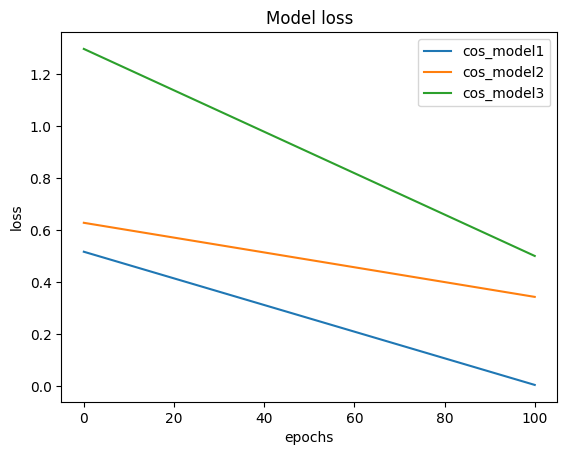

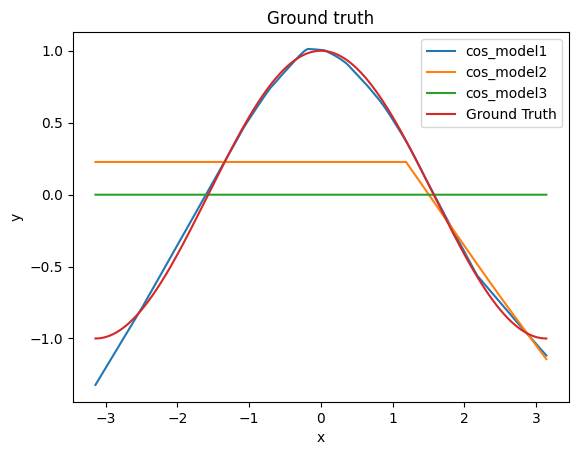

In [50]:
# Plotting model loss and ground truth for cosine neural networks
fig, ax = plt.subplots()
ax.plot(epochx1, lossy1, epochx2, lossy2, epochx3, lossy3)
ax.set(xlabel="epochs",ylabel="loss", title="Model loss")
ax.legend(labels=['cos_model1','cos_model2','cos_model3'])

fig2, ax2 = plt.subplots()
x = torch.linspace(-math.pi, math.pi, 5000, dtype=dtype)
y = torch.cos(x)

with torch.no_grad():
    m1_y = cos_model1(x.unsqueeze(1)).cpu().numpy()
    m2_y = cos_model2(x.unsqueeze(1)).cpu().numpy()
    m3_y = cos_model3(x.unsqueeze(1)).cpu().numpy()
    x = x.cpu().numpy()
    y = y.cpu().numpy()

ax2.plot(x, m1_y, x, m2_y, x, m3_y, x, y)
ax2.set(xlabel='x',ylabel='y', title='Ground truth')
ax2.legend(labels=['cos_model1', 'cos_model2','cos_model3', 'Ground Truth'])


## 1-1. Training on actual task

60000
10000
7


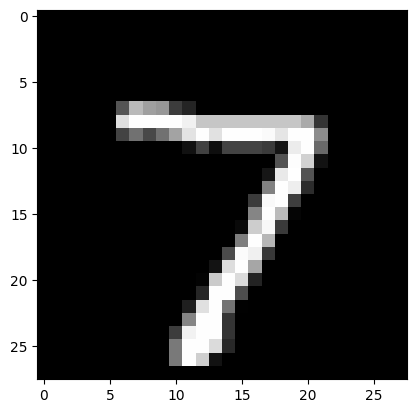

In [58]:
from torchvision import datasets
from torchvision.transforms import ToTensor
training_ds = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
test_ds = datasets.MNIST(root='data', train=False, download=True, transform=ToTensor())

print(len(training_ds))
print(len(test_ds))
img, lbl = test_ds[0]
print(lbl)
plt.imshow(img.squeeze(), cmap='gray')

